Epoch 0, Train Loss: 3.9088641835826374, Val Loss: 3.2557829365667974, Val Acc: 0.0
Epoch 10, Train Loss: 2.5487309449508393, Val Loss: 2.311841342197676, Val Acc: 0.0
Epoch 20, Train Loss: 1.0882271643635393, Val Loss: 0.7671819003717768, Val Acc: 0.5309734513274337
Epoch 30, Train Loss: 0.18723267263756802, Val Loss: 0.13975371018508412, Val Acc: 0.9203539823008849
Epoch 40, Train Loss: 0.052582719413848004, Val Loss: 0.045368959612684945, Val Acc: 1.0
Epoch 50, Train Loss: 0.030002830816899338, Val Loss: 0.02710765077046865, Val Acc: 1.0


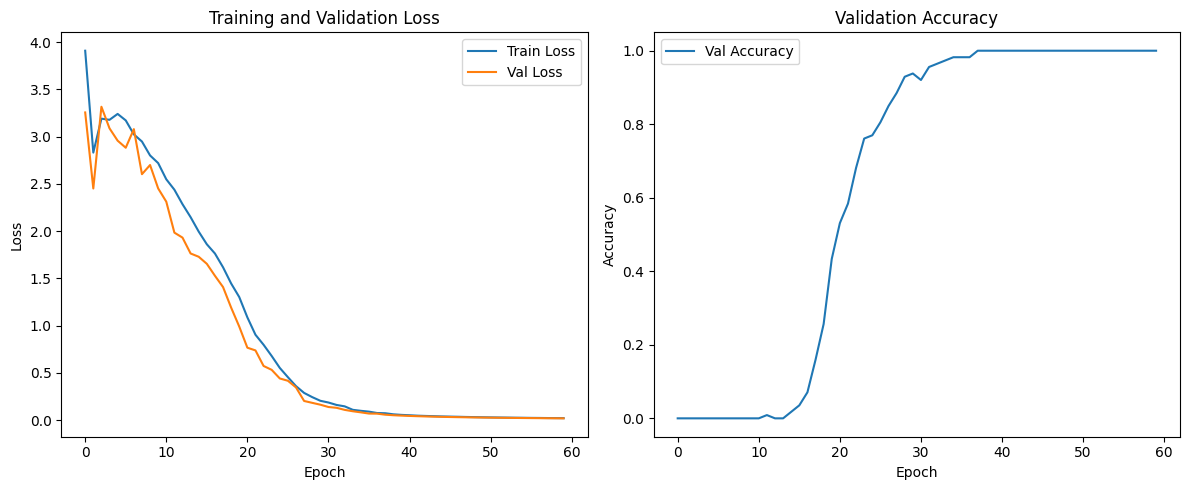


Qualitative Validation with Attention Visualization:
English: I am cold -> French: J'ai froid


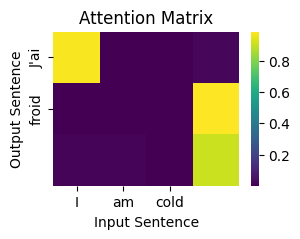

English: They are students -> French: Ils sont étudiants


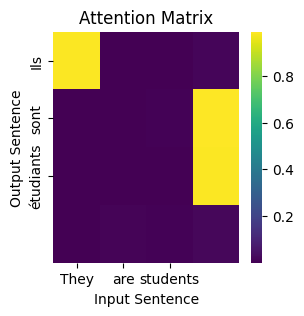

English: We are students -> French: Nous sommes amis


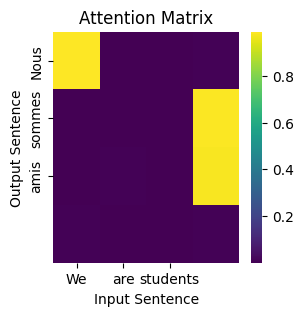

English: He speaks French -> French: Il étudie l'histoire


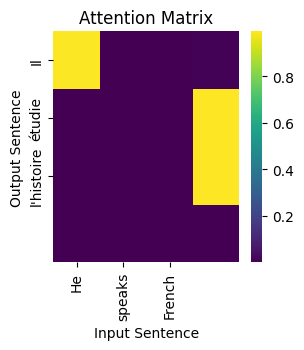

English: They play music -> French: Ils font du vélo


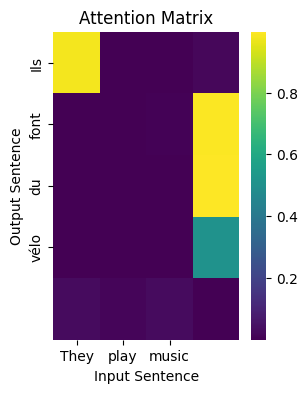

English: The cat is hungry -> French: Le soleil brille


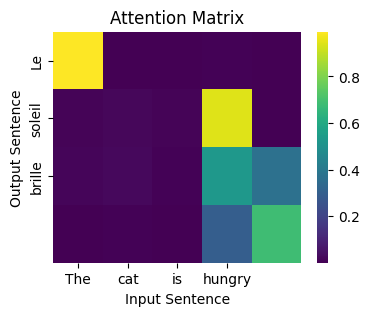

English: The sun sets -> French: Le bébé pleure


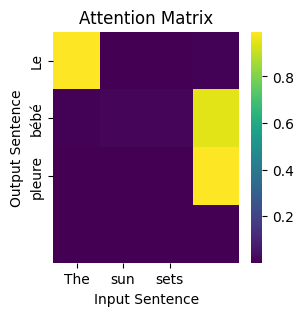

English: We love books -> French: Nous sommes des films


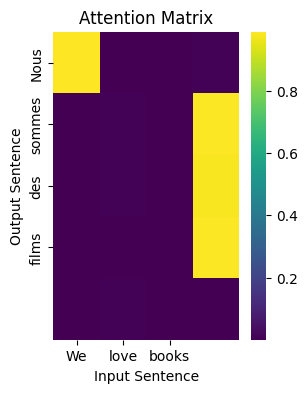

English: She enjoys jogging -> French: Elle rêve de la plage


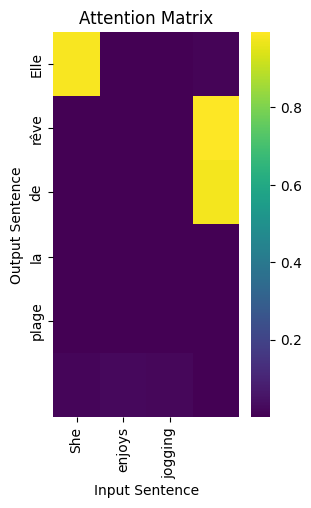

English: He drives a car -> French: Il conduit une voiture


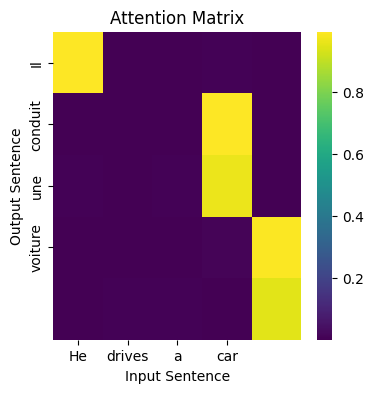

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset containing pairs of English and French sentences
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

# Special tokens for the start and end of sequences
SOS_token = 0  # Start Of Sequence Token
EOS_token = 1  # End Of Sequence Token

# Preparing the word to index mapping and vice versa
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
index_to_word = {SOS_token: "SOS", EOS_token: "EOS"}

# Build vocabulary
for eng, fr in english_to_french:
    for word in eng.split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(word_to_index) - 1] = word
    for word in fr.split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(word_to_index) - 1] = word

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        input_sentence, target_sentence = self.dataset[idx]
        input_tensor = torch.tensor([self.word_to_index[word] for word in input_sentence.split()] + [EOS_token], dtype=torch.long)
        target_tensor = torch.tensor([self.word_to_index[word] for word in target_sentence.split()] + [EOS_token], dtype=torch.long)
        return input_tensor, target_tensor

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

class AttnDecoder(nn.Module):
    """Decoder with attention mechanism."""
    def __init__(self, hidden_size, output_size, max_length=10, dropout_p=0.1):
        super(AttnDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # Calculate attention weights
        attn_weights = torch.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        # Apply attention weights to encoder outputs to get context
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)

        output = torch.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = AttnDecoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.01

# Initializing optimizers for both encoder and decoder with Stochastic Gradient Descent (SGD)
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Define the train function
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=10):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

# Set number of epochs for training
n_epochs = 60


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def calculate_accuracy(predicted_indices, target_tensor):
    return int(predicted_indices == target_tensor.tolist())

def evaluate(encoder, decoder, dataloader, criterion, max_length=10):
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

            loss = 0

            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(
                    decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            total_loss += loss.item() / target_length
            correct_predictions += calculate_accuracy(predicted_indices, target_tensor)

        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)

    return average_loss, accuracy

# Training loop
for epoch in range(n_epochs):
    encoder.train()
    decoder.train()

    total_train_loss = 0
    total_train_correct = 0

    for input_tensor, target_tensor in dataloader:
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss

    avg_train_loss = total_train_loss / len(dataloader)
    avg_train_accuracy = total_train_correct / len(dataloader)

    # validation using same dataset
    avg_val_loss, avg_val_accuracy = evaluate(encoder, decoder, dataloader, criterion)


    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}, Val Acc: {avg_val_accuracy}')

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Function to generate translations with attention
def generate_translation_with_attention(encoder, decoder, sentence, word_to_index, index_to_word, max_length=10):
    with torch.no_grad():
        input_tensor = torch.tensor([word_to_index[word] for word in sentence.split()] + [EOS_token], dtype=torch.long, device=device)
        input_length = input_tensor.size(0)

        encoder_hidden = encoder.initHidden()


        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)
        decoder_hidden = encoder_hidden

        decoded_words = []
        attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            attentions[di] = decoder_attention.data
            topv, topi = decoder_output.topk(1)
            if topi.item() == EOS_token:
                break
            else:
                decoded_words.append(index_to_word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return ' '.join(decoded_words), attentions[:di+1, :input_length]

# Function to plot attention matrix
def plot_attention(attention, input_sentence, output_sentence):
    fig, ax = plt.subplots(figsize=(len(input_sentence.split()), len(output_sentence.split())))
    sns.heatmap(attention, cmap='viridis', ax=ax, xticklabels=input_sentence.split(), yticklabels=output_sentence.split(),cbar=True)
    plt.xlabel('Input Sentence')
    plt.ylabel('Output Sentence')
    plt.title('Attention Matrix')
    plt.show()

# Validation sentences
validation_sentences = [
    "I am cold",
    "They are students",
    "We are students",
    "He speaks French",
    "They play music",
    "The cat is hungry",
    "The sun sets",
    "We love books",
    "She enjoys jogging",
    "He drives a car"
]

#print translations for validation sentences with attention visualization
print("\nQualitative Validation with Attention Visualization:")
for sentence in validation_sentences:
    translation, attention = generate_translation_with_attention(encoder, decoder, sentence, word_to_index, index_to_word)
    print(f"English: {sentence} -> French: {translation}")
    plot_attention(attention.cpu().numpy(), sentence, translation)

